# Go Code Coloardo Team Health Oasis

## 1) Reading a csv file that contains Colorado ZIP codes and population data

In [1]:
# First, we need to read the data file obtained from 
# (https://data.colorado.gov/Demographics/Census-Zip-Codes-in-Colorado-2018/iuxm-ddzz/data)
# We will be using Pandas to process and manipulate the data
import pandas as pd  
import numpy as np

zipcodes_pop = pd.read_csv('surfacePop.csv')
# Let's check the first 20 rows
zipcodes_pop.head()

,zipcode,population,squaremeters,Squaremiles
0,81630,1151,3.299956e+09,1274
1,81434,271,1.606292e+09,620
2,81323,4758,1.955505e+09,755
3,81641,3862,3.959728e+08,153
4,81152,1126,1.245724e+09,481


In [2]:
# Delete the 'squaremeters' column
zipcodes_pop = zipcodes_pop.drop(['squaremeters'], axis = 1)

In [3]:
# Rename columns
zipcodes_pop = zipcodes_pop.rename({'zipcode':'zip', 'Squaremiles': 'surf_area'}, axis=1)
zipcodes_pop.head()

,zip,population,surf_area
0,81630,1151,1274
1,81434,271,620
2,81323,4758,755
3,81641,3862,153
4,81152,1126,481


## Data cleaning

In [4]:
# Check minimum values for our three columns
zipcodes_pop.min()

zip           80002
population        0
surf_area         1
dtype: int64

In [5]:
# Check maximum values for our three columns
zipcodes_pop.max()

zip           82063
population    74293
surf_area      1538
dtype: int64

In [6]:
# There are ZIP code that definitely don'y belong to Colorado. Delete these
zipcodes_pop = zipcodes_pop[zipcodes_pop['zip'] > 80000] 
zipcodes_pop = zipcodes_pop[zipcodes_pop['zip'] < 81658] 

In [7]:
# Check that the range of ZIP codes is correct
print(zipcodes_pop['zip'].min())
print(zipcodes_pop['zip'].max())

80002
81657


### Check for NaN values

In [8]:
# Check if we have and nan in that 'zip' column
bool_series = pd.isnull(zipcodes_pop['zip'])

In [9]:
# Any 'True'? NO, all good to go.
print(bool_series.unique())
# False means there is none.

[False]


In [10]:
# If we have some NaN in the zip column, we would get rid of these
# zipcodes_pop = zipcodes_pop.dropna()

In [11]:
# Any NaN in the 'population' column?
bool_series_2 = pd.isnull(zipcodes_pop['population'])
print(bool_series_2.unique())

[False]


In [12]:
# Any NaN in the 'surf_are' column?
bool_series_3 = pd.isnull(zipcodes_pop['surf_area'])
print(bool_series_3.unique())

[False]


In [13]:
# What type are our columns?
zipcodes_pop.dtypes

zip           int64
population    int64
surf_area     int64
dtype: object

In [14]:
# This bit would be used if the columns wre not of int type.
#Using the try/except feature, we try to convert the 'pop' column to integers
#try:
#    zipcodes_pop['population'] = zipcodes_pop['population'].astype('int')
#    print("all good")
#except:
#    print("Order value is invalid")

# 2) Read in the License Colorado file

In [15]:
# Read in the licensee data file (DORA)
licenses = pd.read_csv ('DORA_licencees.csv')
# Take a look at the file
licenses.head()

,lastName,firstName,middleName,suffix,entityName,city,state,mailZipCode,licensePrefix,subCategory,...,licenseStatusDescription,specialty,title,degrees,caseNumber,programAction,disciplineEffectiveDate,disciplineCompleteDate,linkToVerifyLicense,linkToViewHealthcareProfile
0,Lonnquist,Eryn,Amelia,NaN,NaN,Denver,CO,80206,TL,NaN,...,Expired,Internal Medicine,NaN,~Medical Doctor,NaN,NaN,NaN,NaN,https://www.colorado.gov/dora/licensing/Lookup...,NaN
1,Ward,Cindy,Lou,NaN,NaN,Platteville,CO,80651,COS,NaN,...,Active,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.colorado.gov/dora/licensing/Lookup...,NaN
2,Sherman-Luce,Nicole,Dawn,NaN,NaN,Nome,AK,99762,NaN,NaN,...,Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.colorado.gov/dora/licensing/Lookup...,https://www.colorado.gov/dora/licensing/Snapsh...
3,James,Joseph,NaN,NaN,NaN,Golden,CO,80401,APE,NaN,...,Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.colorado.gov/dora/licensing/Lookup...,NaN
4,Patnode,Leo,Jon,NaN,NaN,Lafayette,CO,80026,JW,NaN,...,Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.colorado.gov/dora/licensing/Lookup...,NaN


## Data cleaning

In [16]:
# Check the column types
licenses.dtypes

lastName                        object
firstName                       object
middleName                      object
suffix                          object
entityName                      object
city                            object
state                           object
mailZipCode                     object
licensePrefix                   object
subCategory                     object
licenseNumber                   object
licenseFirstIssueDate           object
licenseLastRenewedDate          object
licenseExpirationDate           object
licenseStatusDescription        object
specialty                       object
title                          float64
degrees                         object
caseNumber                      object
programAction                   object
disciplineEffectiveDate         object
disciplineCompleteDate          object
linkToVerifyLicense             object
linkToViewHealthcareProfile     object
dtype: object

In [17]:
# Get rid of unwanted columns
licenses.drop(licenses.columns.difference(['city', 'state', 'mailZipCode', 'licensePrefix', 'licenseStatusDescription']), 1, inplace = True)

/var/folders/fq/3h6g5ypj38s_1gp9nm9n_ytc0000gn/T/ipykernel_11143/1728627736.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  licenses.drop(licenses.columns.difference(['city', 'state', 'mailZipCode', 'licensePrefix', 'licenseStatusDescription']), 1, inplace = True)


In [18]:
# Check the file again
licenses.head()

,city,state,mailZipCode,licensePrefix,licenseStatusDescription
0,Denver,CO,80206,TL,Expired
1,Platteville,CO,80651,COS,Active
2,Nome,AK,99762,NaN,Expired
3,Golden,CO,80401,APE,Expired
4,Lafayette,CO,80026,JW,Expired


In [19]:
# Rename these three columns of interest
licenses = licenses.rename({'mailZipCode': 'zip', 'licensePrefix': 'license_type', 'licenseStatusDescription':'status'}, axis=1)
licenses.head()

,city,state,zip,license_type,status
0,Denver,CO,80206,TL,Expired
1,Platteville,CO,80651,COS,Active
2,Nome,AK,99762,NaN,Expired
3,Golden,CO,80401,APE,Expired
4,Lafayette,CO,80026,JW,Expired


In [20]:
# Change 'state' values to upper case
licenses['state'] = licenses['state'].str.upper()

In [21]:
# Since the project is about Colorado, get rid of non-Colorado states
licenses.drop(licenses.index[licenses['state'] != 'CO'], inplace=True)

In [22]:
# Check to see if we have any NaN in the ZIP code column
bool_series = pd.isnull(licenses['zip'])

In [23]:
# Any 'True'? NO, all good to go.
print(bool_series.unique())

[False  True]


In [24]:
# For some reason, we have some NaN in the zip column. Let's get rid of these
licenses = licenses.dropna()

In [25]:
# Check that all NaN are gone
bool_series = pd.isnull(licenses['zip'])
print(bool_series.unique())

[False]


In [26]:
# This file is not super clean. Some ZIP code values are characers in them.
# Eliminate all rows that have char in ZIP (invalid)
licenses = licenses[licenses['zip'].str.isdigit()]

In [27]:
# Now we can convert the type to int
licenses['zip'] = licenses['zip'].astype('int')

In [28]:
# There are ZIP code that don't belong to Colorado
# Most likely, these were entered incorrectly
licenses = licenses[licenses['zip'] > 80000] 
licenses = licenses[licenses['zip'] < 81658] 

In [29]:
# Check that the range of ZIP code in this file are correct
print(licenses['zip'].min())
print(licenses['zip'].max())

80001
81657


In [30]:
# Let's check again in the column types
licenses.dtypes

city            object
state           object
zip              int64
license_type    object
status          object
dtype: object

In [31]:
# Get a list of all values for licenses in the file
print(licenses['status'].unique())

['Expired' 'Active' 'Cancelled' 'Active - Provisional' 'Surrendered'
 'Revoked' 'Inactive' 'Active - Restricted' 'Suspended'
 'Active - With Conditions' 'Beyond 6 Years Expired' 'Retired'
 'Voluntary Surrender' 'Transferred to Compact Physician'
 'Grad to Higher Level' 'Suspended Due to Child Support'
 'Need Master Hire - Cannot Practice' 'Active - Pending Supervisor'
 'Summary Suspension' 'Active - Refresher Course Only'
 'Active - Reentry License']


In [32]:
# Getting rid of Expired and otherwise invalid licenses
licenses.drop(licenses.index[licenses['status'] == 'Expired'], inplace=True)
licenses.drop(licenses.index[licenses['status'] == 'Cancelled'], inplace=True)
licenses.drop(licenses.index[licenses['status'] == 'Beyond 6 Years Expired'], inplace=True)
licenses.drop(licenses.index[licenses['status'] == 'Surrendered'], inplace=True)
licenses.drop(licenses.index[licenses['status'] == 'Revoked'], inplace=True)
licenses.drop(licenses.index[licenses['status'] == 'Inactive'], inplace=True)
licenses.drop(licenses.index[licenses['status'] == 'Suspended'], inplace=True)
licenses.drop(licenses.index[licenses['status'] == 'Retired'], inplace=True)
licenses.drop(licenses.index[licenses['status'] == 'Voluntary Surrender'], inplace=True)
licenses.drop(licenses.index[licenses['status'] == 'Transferred to Compact Physician'], inplace=True)
licenses.drop(licenses.index[licenses['status'] == 'Grad to Higher Level'], inplace=True)
licenses.drop(licenses.index[licenses['status'] == 'Need Master Hire - Cannot Practice'], inplace=True)
licenses.drop(licenses.index[licenses['status'] == 'Suspended Due to Child Support'], inplace=True)
licenses.drop(licenses.index[licenses['status'] == 'Summary Suspension'], inplace=True)

# Confirm we got rid of all the unwanted licenses
print(licenses['status'].unique())

['Active' 'Active - Provisional' 'Active - Restricted'
 'Active - With Conditions' 'Active - Pending Supervisor'
 'Active - Refresher Course Only' 'Active - Reentry License']


In [33]:
# Drop all NaN in license_type
licenses = licenses.dropna()
licenses.head()

,city,state,zip,license_type,status
1,Platteville,CO,80651,COS,Active
5,Denver,CO,80231,PHATP,Active
10,Denver,CO,80207,RN,Active
15,Colorado Springs,CO,80906,LPC,Active
16,Lakewood,CO,80228,MT,Active


# 3) Merge the two Pandas DataFrames

In [34]:
# Merge the two files on'zip'
licenses_merged = licenses.merge(zipcodes_pop, on=['zip'], how = 'right')
licenses_merged.head()

,city,state,zip,license_type,status,population,surf_area
0,De Beque,CO,81630,MT,Active,1151,1274
1,De Beque,CO,81630,RN,Active,1151,1274
2,De Beque,CO,81630,ME,Active,1151,1274
3,De Beque,CO,81630,AP,Active,1151,1274
4,DeBeque,CO,81630,OUT,Active,1151,1274


# 4) License Types & Count
## In this last part, we will count the number of relevant licenses and assign that total number to each person. This will allow us to normalize the data for our heat map

In [35]:
# Drop rows that don't have data
licenses_merged.replace([np.inf, -np.inf], 0, inplace=True)
licenses_merged = licenses_merged.dropna()

In [36]:
licenses_merged.head()

,city,state,zip,license_type,status,population,surf_area
0,De Beque,CO,81630,MT,Active,1151,1274
1,De Beque,CO,81630,RN,Active,1151,1274
2,De Beque,CO,81630,ME,Active,1151,1274
3,De Beque,CO,81630,AP,Active,1151,1274
4,DeBeque,CO,81630,OUT,Active,1151,1274


In [37]:
# Let's print all the different types of licenses
print(licenses_merged['license_type'].unique())

['MT' 'RN' 'ME' 'AP' 'OUT' 'JP' 'CSW' 'COS' 'ACC' 'SPDO' 'PC' 'PHAT' 'MP'
 'REG' 'APE' 'HST' 'MAN' 'PE' 'LPCC' 'CPA' 'PN' 'APN' 'DR' 'PHATP' 'PLS'
 'COZ' 'PHA' 'LPC' 'MAA' 'ACU' 'ST' 'PTL' 'VET' 'JW' 'RTL' 'RXN' 'DEN'
 'AT' 'C-APN' 'MWR' 'CHR' 'DH' 'LA' 'HAAP' 'IV' 'LOCAL' 'NLC' 'PA' 'EL'
 'RW' 'C-RXN' 'OPT' 'EC' 'PTA' 'SA' 'NHA' 'OT' 'PDO' 'MFT' 'BAR' 'ACD'
 'OO' 'AC' 'SLP' 'FH' 'RP' 'ARC' 'DRP' 'TRM' 'MFTC' 'LSW' 'IN' 'CDRH'
 'OTA' 'CM' 'FRM' 'PSY' 'ITR' 'MODS' 'PAR' 'T-NA' 'SWC' 'LTD' 'ACA' 'MI'
 'TL' 'PSYC' 'AV' 'MFR' 'HAD' 'COR' 'ND' 'POD' 'AUD' 'WHI' 'MSPTA' 'GEN'
 'PSLP' 'MINS' 'ADDC' 'DD' 'MIV' 'MWM' 'MWS' 'APT' 'MSCSW' 'MSPHA' 'MSRN'
 'MSDH' 'ANT' 'AIT' 'ANI' 'PDT' 'WC' 'WP' 'WI' 'OFC' 'RME' 'RMT' 'CDR'
 'LPP' 'TLTP' 'AD' 'TDP' 'PRO' 'T-PN' 'MSRMT' 'MSRME' 'DOC-RN' 'HSP'
 'TMPMOD' 'C-IV' 'SRN' 'DOC-NA' 'SWP' 'OPV' 'PDV' 'T-DR' 'MSNA' 'MSPHAT'
 'MSPN' 'MSOT' 'MSMT' 'MSST' 'MSLOC' 'MSCOZ' 'NHATPE' 'MSOPT' 'MSPA'
 'MSPTL' 'MSCOS' 'MSLSW' 'MSLPP' 'MSJW' 'MSOTA' 'MSLPCC' 'MSMAN' 'M

In [38]:
# Count the number of licenses per type and per zip code
# This is important for the projet!
licenses_merged['lic_count_per_zip'] = licenses_merged.groupby(['zip','license_type'])['zip'].transform(len)
licenses_merged['lic_count_per_zip'] = licenses_merged['lic_count_per_zip'].astype('int')

licenses_merged.sort_values(by=['zip'])
# What does it look like?
licenses_merged.head()

,city,state,zip,license_type,status,population,surf_area,lic_count_per_zip
0,De Beque,CO,81630,MT,Active,1151,1274,3
1,De Beque,CO,81630,RN,Active,1151,1274,5
2,De Beque,CO,81630,ME,Active,1151,1274,2
3,De Beque,CO,81630,AP,Active,1151,1274,5
4,DeBeque,CO,81630,OUT,Active,1151,1274,5


In [39]:
# Get rid of ZIP codes with population of zero as it makes no sense to have a licencee in a zero pop ZIP code region
licenses_merged.drop(licenses_merged.index[licenses_merged['population'] == 0], inplace=True)

In [40]:
# Get a summary of the merge dataframe
licenses_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374402 entries, 0 to 374688
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   city               374402 non-null  object
 1   state              374402 non-null  object
 2   zip                374402 non-null  int64 
 3   license_type       374402 non-null  object
 4   status             374402 non-null  object
 5   population         374402 non-null  int64 
 6   surf_area          374402 non-null  int64 
 7   lic_count_per_zip  374402 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 25.7+ MB


# 5) Normalization using the ZIP code surface area and population

## To better represent the data, we decided to normalize output values. We will normalize the number of licenses for each type of licenses by polulation density.
## Population density is simply the population in a particular ZIP code region divided by the surface area of the ZIP code region.


In [41]:
# Delete row with no data
licenses_merged.replace([np.inf, -np.inf], 0, inplace=True)
licenses_merged = licenses_merged.dropna()

In [42]:
# Check tha ZIP code range once again
print(licenses_merged['zip'].min())
print(licenses_merged['zip'].max())

80002
81657


In [43]:
# Min and max population numbers
print(licenses_merged['population'].min())
print(licenses_merged['population'].max())

8
74293


In [44]:
# Min and max surface are numbers

print(licenses_merged['surf_area'].min())
print(licenses_merged['surf_area'].max())

1
1538


In [45]:
# Population density is the number of people divided by the surface area of the zip code region
licenses_merged['density'] = (licenses_merged['population']) / (licenses_merged['surf_area'])

In [46]:
# What kind of numbers are we getting?
print(licenses_merged['density'].min())
print(licenses_merged['density'].max())

0.0449438202247191
21368.0


Text(0, 0.5, 'Population')

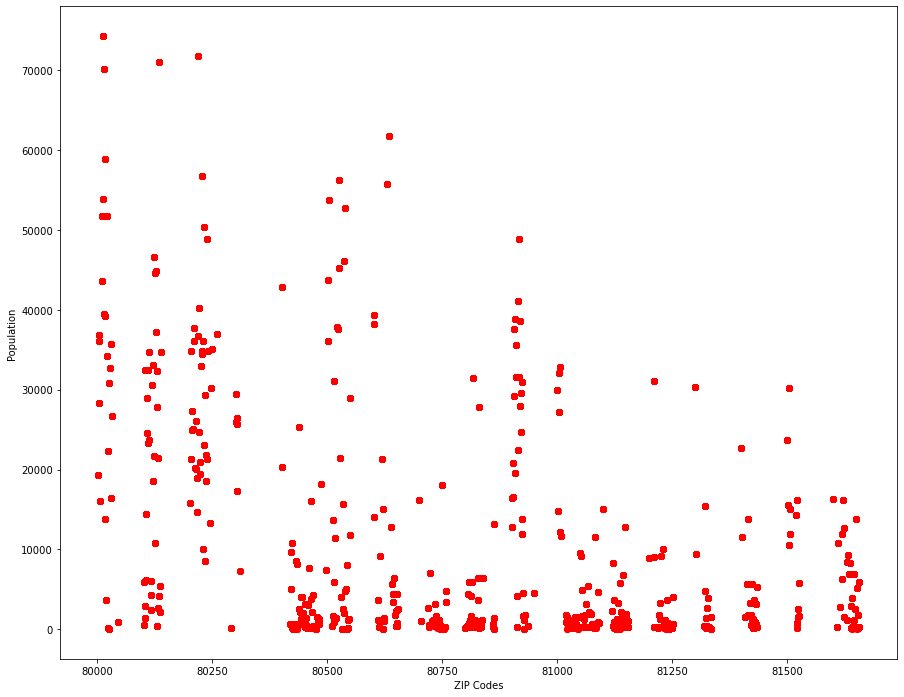

In [47]:
# A quick viz might be helpful here. A bar graph would be better since we are dealing with discrete data but we have
# too many ZIP codes
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(15,12))


x = licenses_merged[('zip')]
y = licenses_merged[('population')]

ax.scatter(x, y, c = 'red', marker = 'o')
ax.set_xlabel('ZIP Codes')
ax.set_ylabel('Population')

In [48]:
# To avoid a division by zero down below, we will assingme a density of 1 to all zero values.
licenses_merged['density'].replace(to_replace = 0, value = 1, inplace=True)

In [49]:
# What is the range of the licence count by type by ZIP code?
print(licenses_merged['lic_count_per_zip'].min())
print(licenses_merged['lic_count_per_zip'].max())

1
1803


In [50]:
# Normalize licence count by density
licenses_merged['nbr_lic_norm'] = (licenses_merged['lic_count_per_zip']) / (licenses_merged['density'])
licenses_merged['nbr_lic_norm'].round(4)

0         3.3206
1         5.5343
2         2.2137
3         5.5343
4         5.5343
           ...  
374684    1.8609
374685    0.4652
374686    1.8609
374687    1.8609
374688    0.4652
Name: nbr_lic_norm, Length: 374402, dtype: float64

In [59]:

print(licenses_merged['nbr_lic_norm'].min())
print(licenses_merged['nbr_lic_norm'].max())


4.6798951703481845e-05
22.25


In [60]:
# We would like a norm value that varies between 1 & 0. So we normalize the license value by its max
licenses_merged['norm_value'] = (licenses_merged['nbr_lic_norm'])  / (licenses_merged.max(axis=0)['nbr_lic_norm'])
licenses_merged.head()

,city,state,zip,license_type,status,population,surf_area,lic_count_per_zip,density,nbr_lic_norm,norm_value
0,De Beque,CO,81630,MT,Active,1151,1274,3,0.903454,3.320591,0.149240
1,De Beque,CO,81630,RN,Active,1151,1274,5,0.903454,5.534318,0.248733
2,De Beque,CO,81630,ME,Active,1151,1274,2,0.903454,2.213727,0.099493
3,De Beque,CO,81630,AP,Active,1151,1274,5,0.903454,5.534318,0.248733
4,DeBeque,CO,81630,OUT,Active,1151,1274,5,0.903454,5.534318,0.248733


In [53]:
licenses_merged.dtypes

city                  object
state                 object
zip                    int64
license_type          object
status                object
population             int64
surf_area              int64
lic_count_per_zip      int64
density              float64
nbr_lic_norm         float64
norm_value           float64
dtype: object

## Out of curiosity, let's run so correlations on the data

In [54]:
# Correlation between population and surface area of ZIP Code regions
column_1 = licenses_merged['surf_area']
column_2 = licenses_merged['population']
correlation = column_1.corr(column_2)
correlation

-0.3112784591792595

In [55]:
# Correlation between population and our norm_values area of ZIP Code regions
column_1 = licenses_merged['norm_value']
column_2 = licenses_merged['population']
correlation = column_1.corr(column_2)
correlation

-0.2293564031503961

In [56]:
# Correlation between surface area of ZIP Code regions and norm_values
column_1 = licenses_merged['norm_value']
column_2 = licenses_merged['surf_area']
correlation = column_1.corr(column_2)
correlation

0.5994763468284425

In [57]:
# Finally, since we want a list of unique ZIP codes and licenses, 
# we delete duplicate rows (zip and license type)
single_licenses_merged = licenses_merged.drop_duplicates(subset = ['zip', 'license_type'], keep = 'last').reset_index(drop = True)


Text(0.5, 1.0, 'ZIP by Population')

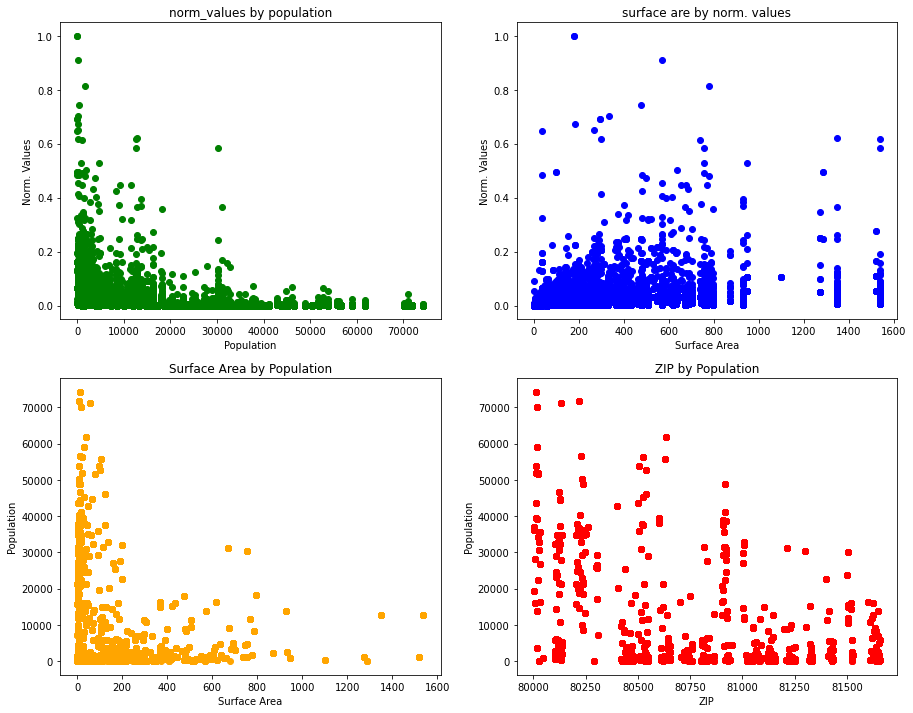

In [61]:
# Let's create some viz to make sure that the data manipulations make sense
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,2, figsize=(15,12))


# Second will be a scatter plot: Norm Values as a function of population in each ZIP code regions 
x2 = single_licenses_merged[('population')]
y2 = single_licenses_merged[('norm_value')]
ax[0, 0].scatter(x2, y2, c = 'green', marker = 'o')
ax[0, 0].set_xlabel('Population')
ax[0, 0].set_ylabel('Norm. Values')

# Third will be a scatter plot: Norm Values as a function of surface area in each ZIP code regions 
x3 = single_licenses_merged[('surf_area')]
y3 = single_licenses_merged[('norm_value')]
ax[0, 1].scatter(x3, y3, c = 'blue', marker = 'o')
ax[0, 1].set_xlabel('Surface Area')
ax[0, 1].set_ylabel('Norm. Values')

# Fourth will be a scatter plot: Population as a function of surface area in each ZIP code regions 
x4 = single_licenses_merged[('surf_area')]
y4 = single_licenses_merged[('population')]
ax[1, 0].scatter(x4, y4, c = 'orange', marker = 'o')
ax[1, 0].set_xlabel('Surface Area')
ax[1, 0].set_ylabel('Population')

x1 = single_licenses_merged[('zip')]
y1 = single_licenses_merged[('population')]
ax[1, 1].scatter(x1, y1, c = 'red', marker = 'o')
ax[1, 1].set_xlabel('ZIP')
ax[1, 1].set_ylabel('Population')


ax[0, 0].set_title('norm_values by population')
ax[0, 1].set_title('surface are by norm. values')
ax[1, 0].set_title('Surface Area by Population')
ax[1, 1].set_title('ZIP by Population')


In [ ]:
# Finally, save the dataframe to a csv file
# This file will be used with the heat map code to create the app
single_licenses_merged.to_csv('zip_data.csv', index = False)